<br></br>
<b><h2> Loading Python Libraries </h2></b>

In [1]:
# Let's import the required python packages
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# %matplotlib inlines

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

<br></br>
<b><h2> Loading the Dataset </h2></b>

In [2]:
# Let's load the Health insurance data into a dataframe using pandas
data_frame = pd.read_csv("hypertension_data.csv")

# Let's take a quick look at the shape of the dataframe
print("hypertension_data.csv -->", data_frame.shape)
print()

# Let's take a brief look at the contents of the dataframe
data_frame.head(10)

hypertension_data.csv --> (26083, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1


<br></br>
<h2><b> Gaining Insights from Data </b></h2>

In [3]:
# Let's obtain a brief overview of the dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [4]:
# Let's see descriptive statistics for all numeric columns
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b><h3>Observations</h3></b>
1. <b> In the dataset more number of people are of age around 55</b>
2. <b> The dataset consists of equal number of males and females i.e 13029</b>.
3. <b> In the dataset more number of people are attacked from type-0 i.e typical angina chest pain.</b> 
4. <b> Patients' median cholesterol levels are 246.25 mg/dL, which is greater than what is advised for the best cardiovascular health.</b>

In [5]:
# # Let's see descriptive statistics for all object columns
# data_frame.describe(include= 'Object')

In [6]:
# Function to get unique_counts based on specific column
def value_counts(column_name):
    return data_frame.loc[:, column_name].value_counts()  # Returns the unique value counts

In [7]:
value_counts("cp")

0    12314
2     7392
1     4456
3     1921
Name: cp, dtype: int64

<b>Distribution before Normalization
</b>

Distribution before Normalization


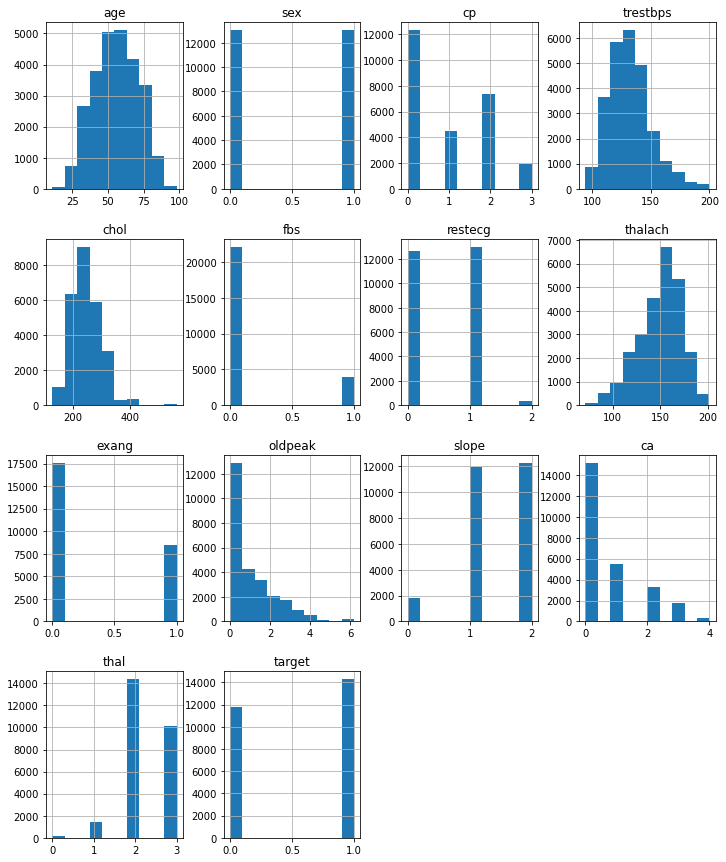

In [9]:
print("Distribution before Normalization")
data_frame.hist(figsize=(12,15))
plt.savefig("Histogram_distribution_before")
plt.show()

<br></br>
### Total number of missing data points in each feature 

In [10]:
data_frame.dropna(inplace = True)

In [11]:
# Let's get the number of missing data points per column
data_frame.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<br></br>
<h2><b> Feature Engineering </b></h2>

In [13]:
numerical_columns = data_frame.select_dtypes(exclude=["object"]).columns.tolist()

#### Features and its datatypes

In [14]:
# Let's see the data types of all the columns after conversion to numerical features
data_frame.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<br></br>
<b><h2> Data Normalization </h2></b>

In [19]:
# Function to normalize the values of each column by subtracting
# the mean and dividing by the standard deviation

def normalization(data_frame, column_name):
    series = data_frame[column_name]
    mean = series.mean()
    std = series.std()
    normalized_series = (series - mean) / std
    return normalized_series

In [20]:
for column_name in data_frame.columns:
    if column_name!="target":
        data_frame[column_name] = normalization(data_frame, column_name)

#### Descriptive statisctics after normalization

In [21]:
# Let's see descriptive statistics for all numeric columns after normalization
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,2.605800e+04,26058.000000
mean,-3.098723e-16,4.967841e-18,-5.077695e-16,1.233034e-16,-3.304190e-17,-2.331008e-16,-5.408386e-16,-1.577439e-16,1.156749e-16,4.836632e-15,5.540165e-16,-3.783399e-18,2.421205e-16,0.547778
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.497722
min,-2.939732e+00,-9.999808e-01,-9.356147e-01,-2.136188e+00,-2.328802e+00,-4.199053e-01,-1.000702e+00,-3.439326e+00,-6.968602e-01,-8.919672e-01,-2.270329e+00,-7.125588e-01,-3.833989e+00,0.000000
25%,-7.673086e-01,-9.999808e-01,-9.356147e-01,-6.586705e-01,-6.831642e-01,-4.199053e-01,-1.000702e+00,-7.278612e-01,-6.968602e-01,-8.919672e-01,-6.483452e-01,-7.125588e-01,-5.274827e-01,0.000000
50%,2.266368e-02,0.000000e+00,4.241193e-02,-9.039464e-02,-1.217112e-01,-4.199053e-01,9.015659e-01,1.468048e-01,-6.968602e-01,-2.056684e-01,-6.483452e-01,-7.125588e-01,-5.274827e-01,1.000000
75%,7.468049e-01,9.999808e-01,1.020439e+00,4.778813e-01,5.559044e-01,-4.199053e-01,9.015659e-01,7.153377e-01,1.434953e+00,4.806304e-01,9.736382e-01,2.762503e-01,1.125770e+00,1.000000
max,2.787567e+00,9.999808e-01,1.998465e+00,3.887537e+00,6.151073e+00,2.381398e+00,2.803834e+00,2.289736e+00,1.434953e+00,4.426849e+00,9.736382e-01,3.242678e+00,1.125770e+00,1.000000


#### Distributions

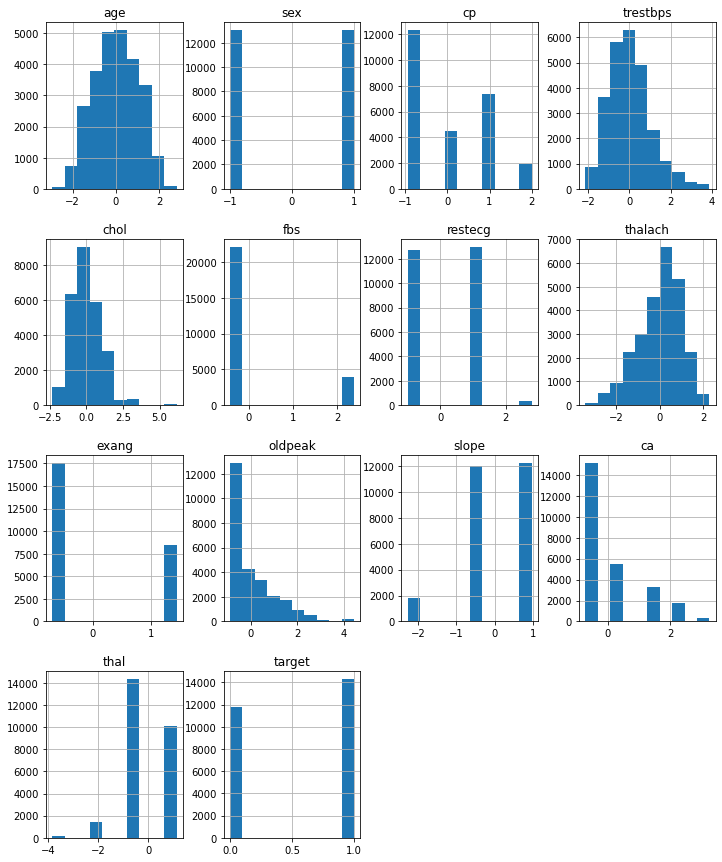

In [22]:
# # Let's confirm that all values in a dataframe are within the range of 0 to 1 using boxplots


data_frame.hist(figsize=(12,15))
plt.savefig("Histogram_distribution_after")
plt.show()
    

# Let's remove empty subplot
# figure.delaxes(axis[nrow_plots - 1][ncol_plots - 1])

<br></br>
<h2><b>Output Column Distribution</b></h2>

In [23]:
# Let's see the percentage of 0's and 1's in output column(RainTomorrow)
percentage = data_frame.loc[:, "target"].value_counts(normalize=True) * 100
percentage

1    54.777803
0    45.222197
Name: target, dtype: float64

#### Pie chart distribution of Target label

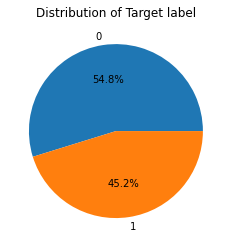

In [24]:
plt.pie(percentage, labels=["0", "1"], autopct="%1.1f%%")
plt.title("Distribution of Target label")
plt.savefig("Piechart_Distribution_of_target_label")
plt.show()

<br></br>
## Phase - 2 Build a model to overfit the entire dataset)

#### Model Building

In [25]:
x_data = data_frame.iloc[:, :-1].values
y_data = data_frame.iloc[:, -1].values

x_data.shape

(26058, 13)

In [26]:
# Let's create a keras sequential model
model = Sequential()

# Let's add dense layer to the model network
model.add(Dense(1, input_dim=data_frame.shape[1] - 1, activation="relu"))

#### Model Compilation

In [27]:
#Compiling a model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### Model Training

In [28]:
# Let's fit the sequential model with input features and output label
history = model.fit(x_data, y_data, epochs=10, verbose=1)

Epoch 1/10
815/815 [==============================] - 3s 2ms/step - loss: 4.3992 - accuracy: 0.6031
Epoch 2/10
815/815 [==============================] - 2s 2ms/step - loss: 3.3161 - accuracy: 0.6822
Epoch 3/10
815/815 [==============================] - 2s 2ms/step - loss: 3.0536 - accuracy: 0.7049
Epoch 4/10
815/815 [==============================] - 2s 2ms/step - loss: 2.8957 - accuracy: 0.7197
Epoch 5/10
815/815 [==============================] - 2s 2ms/step - loss: 2.7139 - accuracy: 0.7337
Epoch 6/10
815/815 [==============================] - 2s 2ms/step - loss: 2.4311 - accuracy: 0.7519
Epoch 7/10
815/815 [==============================] - 2s 2ms/step - loss: 2.1591 - accuracy: 0.7739
Epoch 8/10
815/815 [==============================] - 2s 2ms/step - loss: 2.0141 - accuracy: 0.7841
Epoch 9/10
815/815 [==============================] - 2s 2ms/step - loss: 1.8380 - accuracy: 0.7972
Epoch 10/10
815/815 [==============================] - 2s 2ms/step - loss: 1.6824 - accuracy: 0.8087

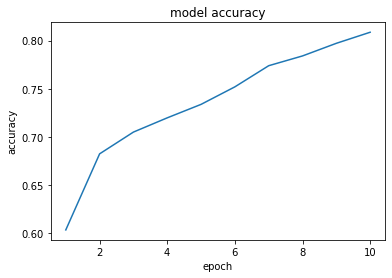

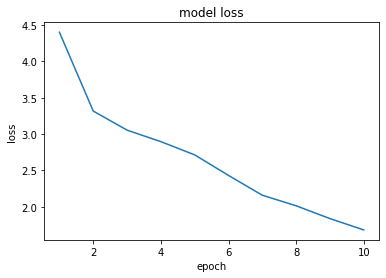

In [29]:
x=np.arange(1,11)

sns.lineplot(x=x, y=history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
# Let's create a keras sequential model
model1 = Sequential()

# Let's add dense layer to the model network
model1.add(Dense(8, input_dim=data_frame.shape[1] - 1, activation="tanh"))
model1.add(Dense(4, activation = "tanh"))
model1.add(Dense(1, activation = "sigmoid"))

In [31]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
history1 = model1.fit(x_data, y_data, epochs=10, verbose=1)

Epoch 1/10
815/815 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8428
Epoch 2/10
815/815 [==============================] - 2s 2ms/step - loss: 0.3215 - accuracy: 0.8785
Epoch 3/10
815/815 [==============================] - 2s 2ms/step - loss: 0.2731 - accuracy: 0.9041
Epoch 4/10
815/815 [==============================] - 2s 2ms/step - loss: 0.2231 - accuracy: 0.9313
Epoch 5/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1856 - accuracy: 0.9499
Epoch 6/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1582 - accuracy: 0.9608
Epoch 7/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1358 - accuracy: 0.9713
Epoch 8/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1169 - accuracy: 0.9788
Epoch 9/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1050 - accuracy: 0.9805
Epoch 10/10
815/815 [==============================] - 2s 3ms/step - loss: 0.0959 - accuracy: 0.9821

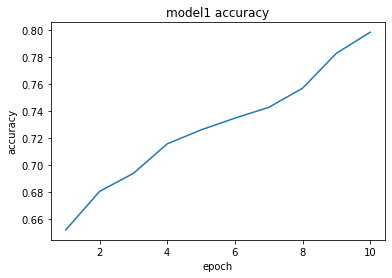

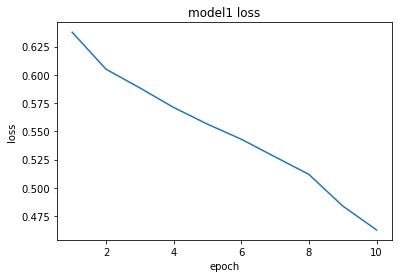

In [101]:
x1=np.arange(1,11)
sns.lineplot(x=x1, y=history1.history['accuracy'])
plt.title('model1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x1, y=history1.history['loss'])
plt.title('model1 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [41]:
# Let's create a keras sequential model
model2 = Sequential()

# # Let's add dense layer to the model network
model2.add(Dense(16, input_dim=data_frame.shape[1] - 1, activation="tanh"))
model2.add(Dense(8, activation = "tanh"))
model2.add(Dense(4, activation = "tanh"))
model2.add(Dense(1, activation = "sigmoid"))

In [42]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
history2 = model2.fit(x_data, y_data, epochs=10, verbose=1)

Epoch 1/10
815/815 [==============================] - 4s 2ms/step - loss: 0.4022 - accuracy: 0.8229
Epoch 2/10
815/815 [==============================] - 2s 2ms/step - loss: 0.2635 - accuracy: 0.9041
Epoch 3/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1868 - accuracy: 0.9424
Epoch 4/10
815/815 [==============================] - 2s 2ms/step - loss: 0.1298 - accuracy: 0.9641
Epoch 5/10
815/815 [==============================] - 2s 2ms/step - loss: 0.0965 - accuracy: 0.9783
Epoch 6/10
815/815 [==============================] - 2s 2ms/step - loss: 0.0724 - accuracy: 0.9868
Epoch 7/10
815/815 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9878
Epoch 8/10
815/815 [==============================] - 2s 2ms/step - loss: 0.0484 - accuracy: 0.9906
Epoch 9/10
815/815 [==============================] - 2s 3ms/step - loss: 0.0435 - accuracy: 0.9908
Epoch 10/10
815/815 [==============================] - 2s 3ms/step - loss: 0.0406 - accuracy: 0.9908

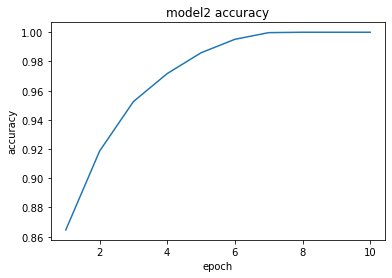

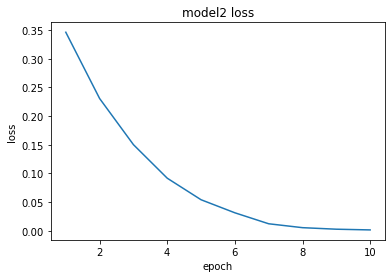

In [36]:
sns.lineplot(x=x, y=history2.history['accuracy'])
plt.title('model2 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history2.history['loss'])
plt.title('model2 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
# Let's create a keras sequential model
model3 = Sequential()

 # Let's add dense layer to the model network
model3.add(Dense(32, input_dim=data_frame.shape[1] - 1, activation="relu"))
model3.add(Dense(26, activation = "relu"))
model3.add(Dense(19, activation = "relu"))
model3.add(Dense(8, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))


In [69]:
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
history3 = model3.fit(x_data, y_data, epochs=10, verbose=1)

Epoch 1/10
815/815 [==============================] - 4s 3ms/step - loss: 0.2642 - accuracy: 0.8980
Epoch 2/10
815/815 [==============================] - 2s 3ms/step - loss: 0.0563 - accuracy: 0.9837
Epoch 3/10
815/815 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 4/10
815/815 [==============================] - 2s 3ms/step - loss: 7.0685e-04 - accuracy: 1.0000
Epoch 5/10
815/815 [==============================] - 2s 3ms/step - loss: 2.4801e-04 - accuracy: 1.0000
Epoch 6/10
815/815 [==============================] - 2s 3ms/step - loss: 1.1090e-04 - accuracy: 1.0000
Epoch 7/10
815/815 [==============================] - 2s 3ms/step - loss: 5.6576e-05 - accuracy: 1.0000
Epoch 8/10
815/815 [==============================] - 2s 3ms/step - loss: 3.0589e-05 - accuracy: 1.0000
Epoch 9/10
815/815 [==============================] - 2s 3ms/step - loss: 1.7120e-05 - accuracy: 1.0000
Epoch 10/10
815/815 [==============================] - 2s 3ms/step - loss: 9

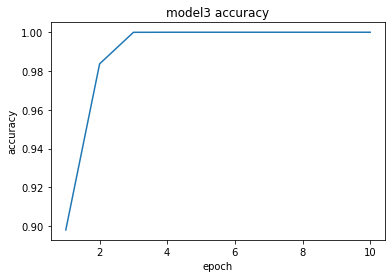

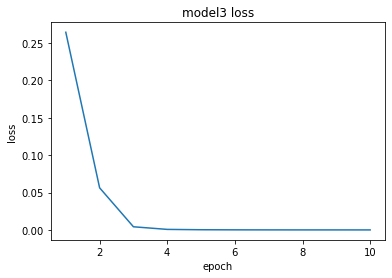

In [71]:
sns.lineplot(x=x, y=history3.history['accuracy'])
plt.title('model3 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history3.history['loss'])
plt.title('model3 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

 <br></br>
<h2><b>Phase 3: Model selection & evaluation</b></h2>

<b>Shuffling the Data</b>

In [72]:
data_frame = data_frame.sample(frac=1).reset_index(drop=True)
data_frame.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.207622,0.999981,0.042412,0.250571,1.407764,2.381398,-1.000702,0.103071,-0.696860,-0.891967,0.973638,1.265059,-0.527483,0.0
1,-1.820605,0.999981,-0.935615,0.477881,-1.147815,-0.419905,-1.000702,-0.246795,1.434953,2.539527,0.973638,1.265059,1.125770,0.0
2,0.483481,0.999981,-0.935615,-1.454257,-0.450839,-0.419905,0.901566,-0.334262,-0.696860,-0.634605,0.973638,1.265059,-0.527483,1.0
3,0.483481,0.999981,-0.935615,-1.226946,1.717531,-0.419905,0.901566,-0.290528,1.434953,1.681653,-0.648345,0.276250,1.125770,0.0
4,-1.293957,0.999981,-0.935615,0.477881,-0.141072,-0.419905,0.901566,0.452938,-0.696860,0.137481,0.973638,-0.712559,-0.527483,1.0
5,-0.372322,0.999981,0.042412,0.477881,-0.992931,-0.419905,0.901566,1.283871,-0.696860,-0.891967,0.973638,1.265059,-0.527483,1.0
6,-0.964802,-0.999981,-0.935615,2.750985,1.562648,-0.419905,2.803834,-1.427594,1.434953,2.024803,-0.648345,-0.712559,-0.527483,0.0
7,-0.240660,0.999981,-0.935615,0.477881,-0.392757,-0.419905,0.901566,1.240137,-0.696860,-0.891967,0.973638,-0.712559,-0.527483,1.0
8,1.339284,0.999981,-0.935615,0.477881,-0.567001,-0.419905,0.901566,-1.689994,1.434953,3.912125,-2.270329,-0.712559,1.125770,0.0
9,0.154326,-0.999981,1.020439,-0.090395,-0.005549,2.381398,-1.000702,1.021471,-0.696860,-0.891967,0.973638,2.253869,-0.527483,1.0


<b>Splitting the Data into Training and Validation</b>

In [81]:
index_30percent = int(0.3 * len(data_frame.iloc[:, 0].values))
print(index_30percent)

XVALIDATION = x_data[:index_30percent, :-1]
YVALIDATION = y_data[:index_30percent]

XTRAIN = x_data[index_30percent:, :-1]
YTRAIN = y_data[index_30percent:]

7817


<b>Creating a model with single layer and neuron architecture</b>

In [82]:
training_model3 = Sequential()

training_model3.add(Dense(1, input_dim=XTRAIN.shape[1], activation = "relu"))

In [83]:
training_model3.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [84]:
history3 = training_model3.fit(XTRAIN, YTRAIN, epochs=10, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback],verbose=1)

Epoch 1/10
547/571 [===========================>..] - ETA: 0s - loss: 6.0044 - accuracy: 0.4862
Epoch 1: val_loss improved from inf to 5.75235, saving model to best_model.hdf5
571/571 [==============================] - 2s 2ms/step - loss: 5.9926 - accuracy: 0.4876 - val_loss: 5.7523 - val_accuracy: 0.5091
Epoch 2/10
550/571 [===========================>..] - ETA: 0s - loss: 5.4578 - accuracy: 0.5305
Epoch 2: val_loss improved from 5.75235 to 5.39494, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 5.4377 - accuracy: 0.5324 - val_loss: 5.3949 - val_accuracy: 0.5341
Epoch 3/10
529/571 [==========================>...] - ETA: 0s - loss: 4.9467 - accuracy: 0.5663
Epoch 3: val_loss improved from 5.39494 to 4.63080, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 4.9274 - accuracy: 0.5677 - val_loss: 4.6308 - val_accuracy: 0.5795
Epoch 4/10
543/571 [===========================>..] - ETA: 0s - loss: 4

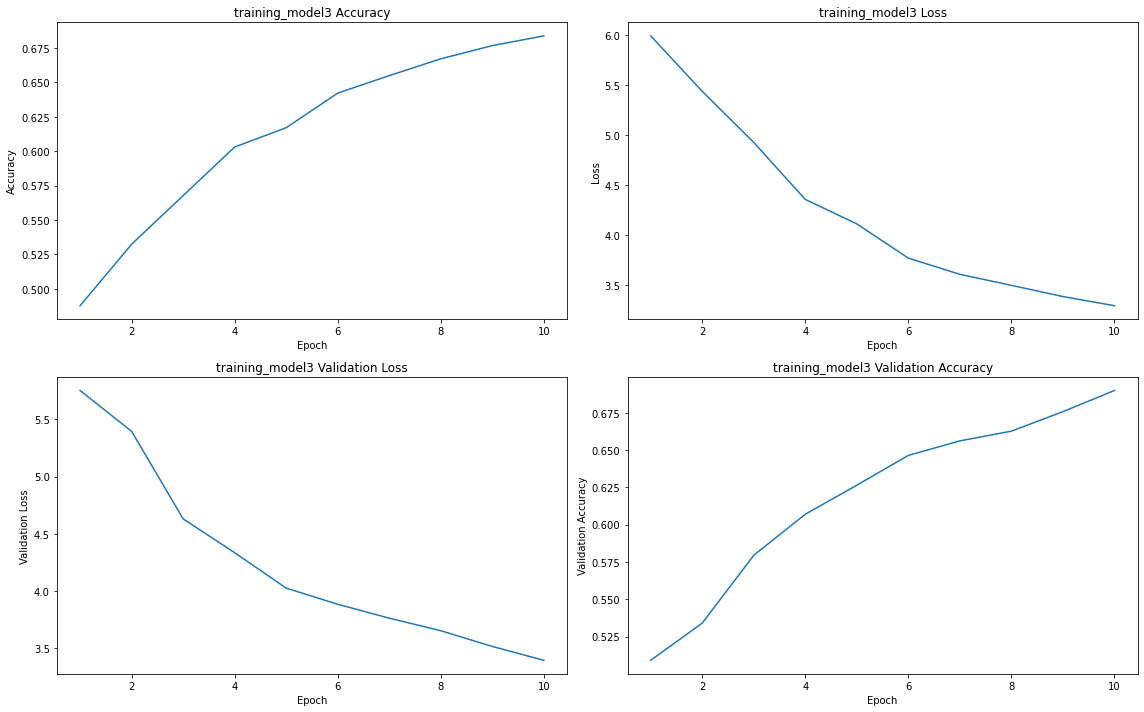

In [106]:

# create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# plot accuracy
sns.lineplot(x=np.arange(1, 11), y=history3.history['accuracy'], ax=axs[0, 0])
axs[0, 0].set_title('training_model3 Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')

# plot loss
sns.lineplot(x=np.arange(1, 11), y=history3.history['loss'], ax=axs[0, 1])
axs[0, 1].set_title('training_model3 Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')

# plot validation loss
sns.lineplot(x=np.arange(1, 11), y=history3.history['val_loss'], ax=axs[1, 0])
axs[1, 0].set_title('training_model3 Validation Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Validation Loss')

# plot validation accuracy
sns.lineplot(x=np.arange(1, 11), y=history3.history['val_accuracy'], ax=axs[1, 1])
axs[1, 1].set_title('training_model3 Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Validation Accuracy')

# adjust layout and show plot
plt.tight_layout()
plt.savefig("training-model3_acc&loss")
plt.show()


245/245 [==============================] - 0s 947us/step


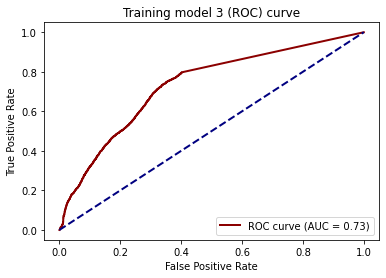

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(YVALIDATION, training_model3.predict(XVALIDATION))

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training model 3 (ROC) curve')
plt.legend(loc="lower right")
plt.savefig("ROC_1")
plt.show()

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the model and obtain predictions on the validation data
y_pred = training_model3.predict(XVALIDATION)

# Apply a threshold of 0.5 to convert output values to binary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(YVALIDATION, y_pred_binary)
recall = recall_score(YVALIDATION, y_pred_binary)
f1 = f1_score(YVALIDATION, y_pred_binary)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

245/245 [==============================] - 0s 914us/step
Precision:  0.7350173353145122
Recall:  0.6867191115224434
F1 score:  0.7100478468899523


In [88]:
training_model4 = Sequential()

training_model4.add(Dense(8, input_dim=XTRAIN.shape[1], activation = "relu"))
training_model4.add(Dense(4, activation = "relu"))
training_model4.add(Dense(1, activation = "sigmoid"))

In [89]:
XTRAIN.shape, XVALIDATION.shape

((18241, 12), (7817, 12))

In [90]:
training_model4.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [91]:
history4 = training_model4.fit(XTRAIN, YTRAIN, epochs=10, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback],verbose=1)

Epoch 1/10
556/571 [============================>.] - ETA: 0s - loss: 0.4812 - accuracy: 0.7653
Epoch 1: val_loss improved from inf to 0.38803, saving model to best_model.hdf5
571/571 [==============================] - 2s 2ms/step - loss: 0.4782 - accuracy: 0.7672 - val_loss: 0.3880 - val_accuracy: 0.8222
Epoch 2/10
548/571 [===========================>..] - ETA: 0s - loss: 0.3683 - accuracy: 0.8338
Epoch 2: val_loss improved from 0.38803 to 0.34247, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8349 - val_loss: 0.3425 - val_accuracy: 0.8462
Epoch 3/10
538/571 [===========================>..] - ETA: 0s - loss: 0.3287 - accuracy: 0.8567
Epoch 3: val_loss improved from 0.34247 to 0.30985, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8571 - val_loss: 0.3099 - val_accuracy: 0.8659
Epoch 4/10
542/571 [===========================>..] - ETA: 0s - loss: 0

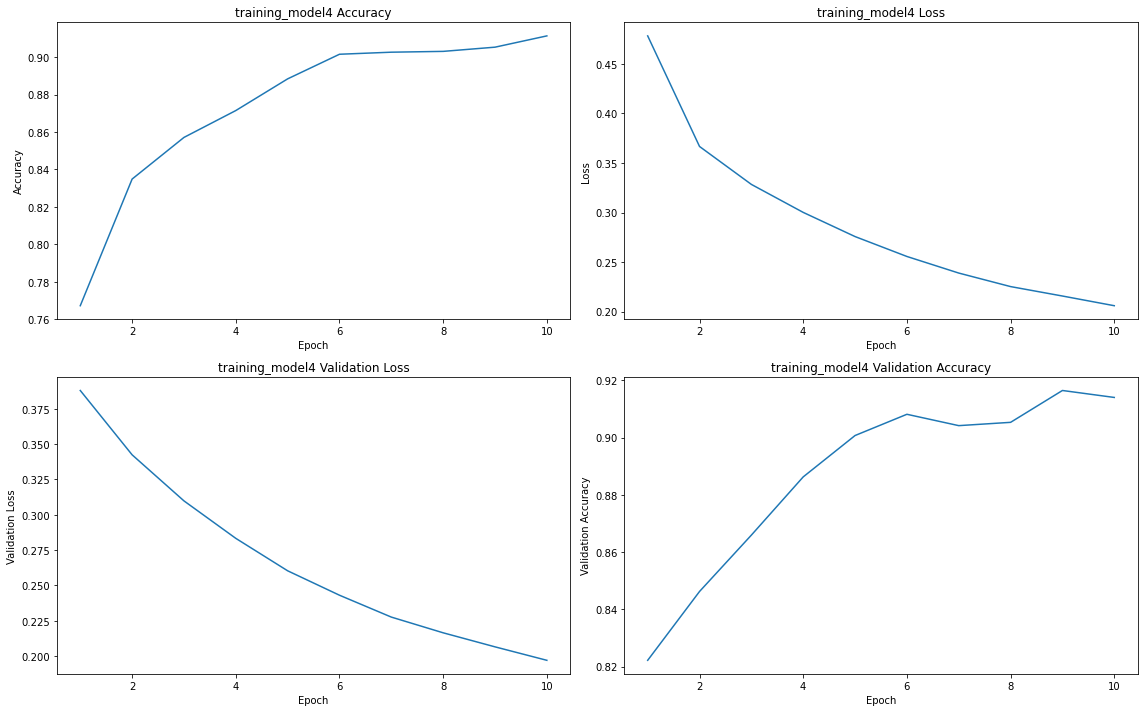

In [107]:
# create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# plot accuracy
sns.lineplot(x=np.arange(1, 11), y=history4.history['accuracy'], ax=axs[0, 0])
axs[0, 0].set_title('training_model4 Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')

# plot loss
sns.lineplot(x=np.arange(1, 11), y=history4.history['loss'], ax=axs[0, 1])
axs[0, 1].set_title('training_model4 Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')

# plot validation loss
sns.lineplot(x=np.arange(1, 11), y=history4.history['val_loss'], ax=axs[1, 0])
axs[1, 0].set_title('training_model4 Validation Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Validation Loss')

# plot validation accuracy
sns.lineplot(x=np.arange(1, 11), y=history4.history['val_accuracy'], ax=axs[1, 1])
axs[1, 1].set_title('training_model4 Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Validation Accuracy')

# adjust layout and show plot
plt.tight_layout()
plt.savefig("training-model4_acc&loss")
plt.show()


245/245 [==============================] - 0s 956us/step


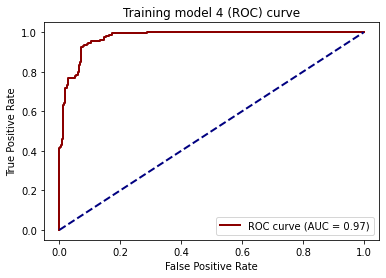

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(YVALIDATION, training_model4.predict(XVALIDATION))

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training model 4 (ROC) curve')
plt.legend(loc="lower right")
plt.savefig("ROC_2")
plt.show()

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the model and obtain predictions on the validation data
y_pred = training_model4.predict(XVALIDATION)

# Apply a threshold of 0.5 to convert output values to binary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(YVALIDATION, y_pred_binary)
recall = recall_score(YVALIDATION, y_pred_binary)
f1 = f1_score(YVALIDATION, y_pred_binary)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

245/245 [==============================] - 0s 904us/step
Precision:  0.891295025728988
Recall:  0.9618232299861176
F1 score:  0.9252170042288004


In [96]:
training_model5 = Sequential()

training_model5.add(Dense(32, input_dim=XTRAIN.shape[1], activation = "relu"))
training_model5.add(Dense(16, activation = "relu"))
training_model5.add(Dense(8, activation = "relu"))
training_model5.add(Dense(1, activation = "sigmoid"))

In [97]:
training_model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [98]:
history5 = training_model5.fit(XTRAIN, YTRAIN, epochs=10, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback],verbose=1)

Epoch 1/10
571/571 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.8422
Epoch 1: val_loss improved from inf to 0.27711, saving model to best_model.hdf5
571/571 [==============================] - 2s 2ms/step - loss: 0.3690 - accuracy: 0.8422 - val_loss: 0.2771 - val_accuracy: 0.8916
Epoch 2/10
548/571 [===========================>..] - ETA: 0s - loss: 0.2365 - accuracy: 0.9061
Epoch 2: val_loss improved from 0.27711 to 0.17599, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 0.2345 - accuracy: 0.9072 - val_loss: 0.1760 - val_accuracy: 0.9326
Epoch 3/10
547/571 [===========================>..] - ETA: 0s - loss: 0.1365 - accuracy: 0.9488
Epoch 3: val_loss improved from 0.17599 to 0.09130, saving model to best_model.hdf5
571/571 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9497 - val_loss: 0.0913 - val_accuracy: 0.9662
Epoch 4/10
556/571 [============================>.] - ETA: 0s - loss: 0

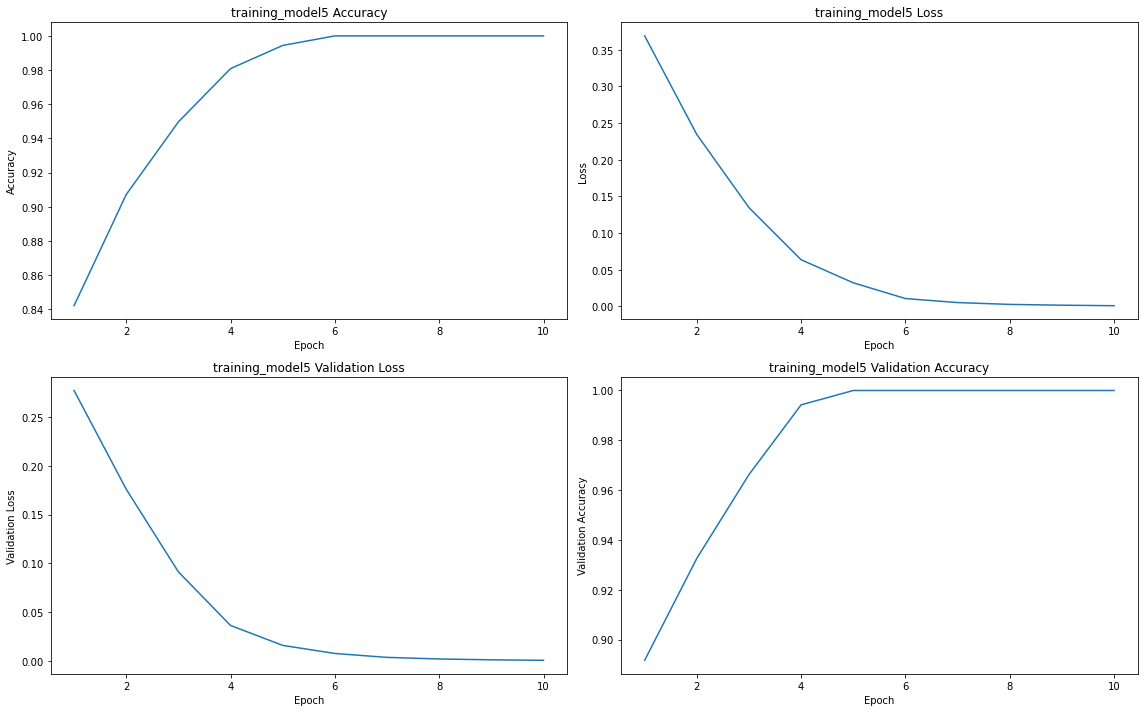

In [108]:
# create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# plot accuracy
sns.lineplot(x=np.arange(1, 11), y=history5.history['accuracy'], ax=axs[0, 0])
axs[0, 0].set_title('training_model5 Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')

# plot loss
sns.lineplot(x=np.arange(1, 11), y=history5.history['loss'], ax=axs[0, 1])
axs[0, 1].set_title('training_model5 Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')

# plot validation loss
sns.lineplot(x=np.arange(1, 11), y=history5.history['val_loss'], ax=axs[1, 0])
axs[1, 0].set_title('training_model5 Validation Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Validation Loss')

# plot validation accuracy
sns.lineplot(x=np.arange(1, 11), y=history5.history['val_accuracy'], ax=axs[1, 1])
axs[1, 1].set_title('training_model5 Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Validation Accuracy')

# adjust layout and show plot
plt.tight_layout()
plt.savefig("training-model5_acc&loss")
plt.show()

245/245 [==============================] - 0s 890us/step


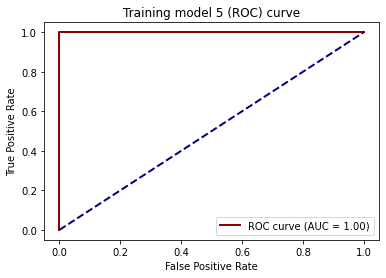

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(YVALIDATION, training_model5.predict(XVALIDATION))

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training model 5 (ROC) curve')
plt.legend(loc="lower right")
plt.savefig("ROC_3")
plt.show()


In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the model and obtain predictions on the validation data
y_pred = training_model5.predict(XVALIDATION)

# Apply a threshold of 0.5 to convert output values to binary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(YVALIDATION, y_pred_binary)
recall = recall_score(YVALIDATION, y_pred_binary)
f1 = f1_score(YVALIDATION, y_pred_binary)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

245/245 [==============================] - 0s 920us/step
Precision:  1.0
Recall:  1.0
F1 score:  1.0


<br></br>
#### Validation of model predictions with custom prediction function

In [ ]:
def rectified(x):
    x = np.array(x)
    return 

def sigmoid(x):
    x = np.
    return 

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def validate_custom_predictions(display_weight=True):
    prediction = XVALIDATION
    total_layers = len(training_model5.layers)

    for layer_number, layer in enumerate(training_model5.layers):
        weights = layer.get_weights()[0].T
        biases = layer.get_weights()[1].T
        if display_weight:
            print(f"Layer Number --> {layer_number}")
            print(f"Weights:\n {weights[0]} ...")
            print(f"Bias:\n {biases[:5]}\n")
        activations = []
        for row in prediction:
            value = []
            for index, w in enumerate(weights):
                output = np.dot(w, row) + biases[index]
                value.append(output)
            value = np.array(value)
            if layer_number < total_layers - 1:
                activations.append(np.maximum(value, 0))
            else:
                activations.append(1 / (1 + np.exp(-value)))

        prediction = np.array(activations)
    prediction = (prediction > 0.5)

    accuracy = accuracy_score(YVALIDATION, prediction.round()) * 100.0
    precision = precision_score(YVALIDATION, prediction.round()) * 100.0
    recall = recall_score(YVALIDATION, prediction.round()) * 100.0
    f1score = f1_score(YVALIDATION, prediction.round())

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")

In [135]:
validate_custom_predictions()

Layer Number --> 0
Weights:
 [-0.00228225 -0.00434497  0.07575062  0.14694512 -0.81314427  0.15120776
 -0.34427294  0.1109793   0.04918455  0.35041496  0.17780091 -0.80111986] ...
Bias:
 [0.03807744 0.29955584 0.27561697 0.2969449  0.10114086]

Layer Number --> 1
Weights:
 [ 0.3297924   0.42576116  0.26464054  0.4267925   0.48778322 -0.10920563
 -0.37509292  0.3264227  -0.3943856   0.12634625  0.26106814 -0.27535298
  0.18139395 -0.1618333   0.19498405 -0.03155609 -0.5648789   0.5687157
  0.31115517  0.38497338 -0.23895364 -0.5580694   0.2431829   0.1007553
 -0.25973254  0.28924254 -0.01708221 -0.05287319  0.2568067   0.09382632
 -0.38419402 -0.10556412] ...
Bias:
 [ 0.09295365  0.11978044  0.25452018 -0.01587194  0.12657565]

Layer Number --> 2
Weights:
 [ 0.59463614 -0.88314116 -0.37345266 -0.75432926  0.4863257  -0.30026636
  0.81255406 -0.48526594  0.680678    0.56354237  1.1071556  -0.7106588
 -0.08341416 -0.01730042  1.370277   -0.08751754] ...
Bias:
 [ 0.14425166  0.18841769  0.

<h2>Observations</h2>

In [ ]:
1.At the end of training (10th epoch), the model achieves a training loss of 3.2948 and training accuracy of 0.6838. The validation loss is 3.39552, and the validation accuracy is 0.6899.
2.The training dataset consists of 571 samples, and there is a separate validation dataset.
3.The model starts with a loss of 0.4812 and an accuracy of 0.7653 on the training set.
4.At the end of training (10th epoch), the model achieves a training loss of 8.8933e-04 and a training accuracy of 1.0000. The validation loss is 6.6193e-04, and the validation accuracy is 1.0000.

<h2>Phase 4: Feature importance and reduction</h2>

In [102]:
training_model5.load_weights("best_model.hdf5")


In [130]:
from sklearn import metrics

def feature_importance():
    # Let's initialize the list to store the feature wise accuracy
    feature_accuracy = {}

    for index in range(XTRAIN.shape[1]):
        # Let's get the values corresponding to the each feature
        Train_feature = XTRAIN[:, index]
        valid_feature = XVALIDATION[:, index]

        single_feature_model = Sequential()
        single_feature_model.add(Dense(32, input_dim=1, activation="relu"))
        single_feature_model.add(Dense(16, input_dim=1, activation="relu"))
        single_feature_model.add(Dense(8, input_dim=1, activation="relu"))
        single_feature_model.add(Dense(1, activation="sigmoid"))

        # Let's build the model
        single_feature_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

        callback_a = ModelCheckpoint("training_model_feature1.hdf5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=0)
        print(f"Fitting Sequencial model on: {data_frame.columns[index]}")
        # Let's fit the sequential model with input features and output label
        history = single_feature_model.fit(x=Train_feature, y=YTRAIN, validation_data=(valid_feature, YVALIDATION), epochs=100, batch_size=100, callbacks=[callback_a], verbose=0)
        # Let's precit on the validation inputs
        Prediction = single_feature_model.predict(valid_feature, verbose=0)
        Prediction = (Prediction > 0.5)
        accuracy_score = metrics.accuracy_score(YVALIDATION, Prediction)
        feature_accuracy[data_frame.columns[index]] = accuracy_score

        print(f"Accuracy score corresponding to {data_frame.columns[index]} --> {accuracy_score}")
        print()
    return feature_accuracy

In [131]:
# Let's call the feature_importance function to calulate the importance of each feature
feature_accuracy = feature_importance()

# Let's print the feature_accuracy dictionary
feature_accuracy

Let's fit the sequential model on age
Accuracy score corresponding to age --> 0.5484201100166304

Let's fit the sequential model on sex
Accuracy score corresponding to sex --> 0.5484201100166304

Let's fit the sequential model on cp
Accuracy score corresponding to cp --> 0.7565562236151977

Let's fit the sequential model on trestbps
Accuracy score corresponding to trestbps --> 0.6173723935013432

Let's fit the sequential model on chol
Accuracy score corresponding to chol --> 0.6430855827043623

Let's fit the sequential model on fbs
Accuracy score corresponding to fbs --> 0.5484201100166304

Let's fit the sequential model on restecg
Accuracy score corresponding to restecg --> 0.5786107202251504

Let's fit the sequential model on thalach
Accuracy score corresponding to thalach --> 0.7147243187923756

Let's fit the sequential model on exang
Accuracy score corresponding to exang --> 0.7254701292055776

Let's fit the sequential model on oldpeak
Accuracy score corresponding to oldpeak --> 0.

{'age': 0.5484201100166304,
 'sex': 0.5484201100166304,
 'cp': 0.7565562236151977,
 'trestbps': 0.6173723935013432,
 'chol': 0.6430855827043623,
 'fbs': 0.5484201100166304,
 'restecg': 0.5786107202251504,
 'thalach': 0.7147243187923756,
 'exang': 0.7254701292055776,
 'oldpeak': 0.7220161187156198,
 'slope': 0.6932326979659716,
 'ca': 0.7408212869387233,
 'thal': 0.7702443392605859}

['age' 'sex' 'fbs' 'restecg' 'trestbps' 'chol' 'slope' 'thalach' 'oldpeak'
 'exang' 'ca' 'cp' 'thal']


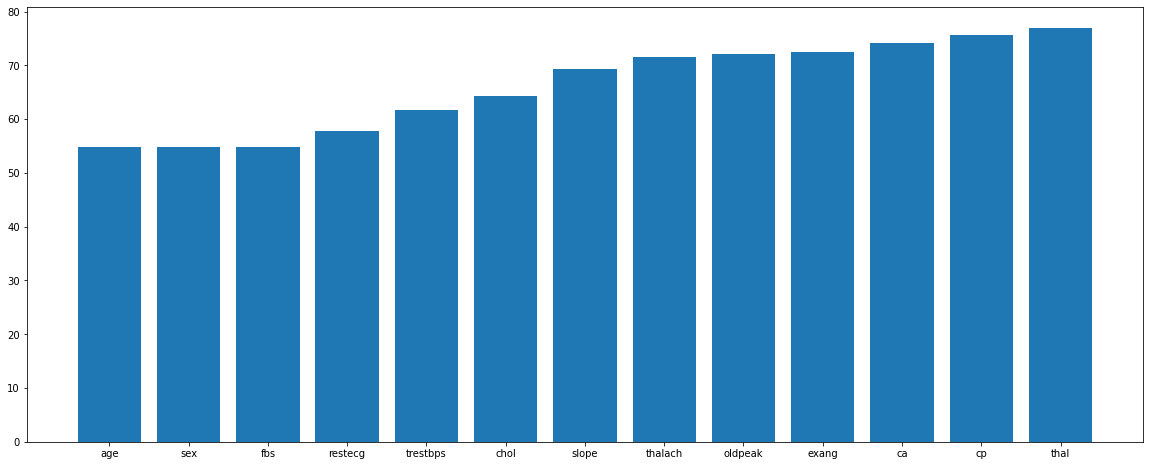

In [132]:
# Sort the validation accuracies in descending order
sorted_accuracies = {key: value for key, value in sorted(feature_accuracy.items(), key=lambda item: item[1])}
sorted_features = np.array(list(sorted_accuracies.keys()))
print(sorted_features)
plt.figure(figsize=(20, 8))

feature_a = np.array(list(sorted_accuracies.values())) * 100
# Plot the validation accuracies
plt.bar(x=list(sorted_accuracies.keys()), height=feature_a)
plt.savefig("feature_imp")
plt.show()


In [258]:
train_df = pd.DataFrame(XTRAIN, columns=data_frame.columns.tolist()[:-1])
validation_df = pd.DataFrame(XVALIDATION, columns=data_frame.columns.tolist()[:-1])


In [259]:
def attribute_reduction_model():
    acc_after_reduction = []
    Val_acc_after_reduction = []

    for feature in sorted_features:
        train_df.drop(feature, axis=1, inplace = True)
        validation_df.drop(feature, axis=1, inplace = True)
        reduction_model = Sequential()
        reduction_model.add(Dense(32, input_dim=train_df.shape[1], activation="relu"))
        reduction_model.add(Dense(16, activation="relu"))
        reduction_model.add(Dense(8, activation="relu"))
        reduction_model.add(Dense(1, activation="sigmoid"))

        reduction_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Define checkpoint callback
        checkpoint_callback = ModelCheckpoint("best_model_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

        reduction_history = reduction_model.fit(train_df.values, YTRAIN, epochs=10, 
                                validation_data=(validation_df.values, YVALIDATION), 
                                callbacks=[checkpoint_callback])

        acc_after_reduction.append({feature: reduction_history.history['accuracy']})
        Val_acc_after_reduction.append({feature: reduction_history.history['val_accuracy']})
        
    return acc_after_reduction, Val_acc_after_reduction

In [260]:
accuracy_Data, Validation_acc_Data = attribute_reduction_model()

Epoch 1/10
556/571 [============================>.] - ETA: 0s - loss: 0.3170 - accuracy: 0.8721
Epoch 1: val_loss improved from inf to 0.21015, saving model to best_model_weights.hdf5
571/571 [==============================] - 5s 4ms/step - loss: 0.3140 - accuracy: 0.8739 - val_loss: 0.2102 - val_accuracy: 0.9390
Epoch 2/10
553/571 [============================>.] - ETA: 0s - loss: 0.1423 - accuracy: 0.9546
Epoch 2: val_loss improved from 0.21015 to 0.09312, saving model to best_model_weights.hdf5
571/571 [==============================] - 2s 4ms/step - loss: 0.1416 - accuracy: 0.9547 - val_loss: 0.0931 - val_accuracy: 0.9681
Epoch 3/10
555/571 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9838
Epoch 3: val_loss improved from 0.09312 to 0.02830, saving model to best_model_weights.hdf5
571/571 [==============================] - 2s 3ms/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 4/10
556/571 [===========================

In [263]:
Validation_acc = []
for feature in Validation_acc_Data:
    feature_name = list(feature.keys())[0]
    accuracy = feature[feature_name]
    end_accu = accuracy[-1]
    print(f"{feature_name}: {end_accu}")

age: 1.0
sex: 1.0
fbs: 1.0
restecg: 1.0
trestbps: 1.0
chol: 0.9718562364578247
slope: 0.9767174124717712
exang: 0.9614942073822021
thalach: 0.906741738319397
oldpeak: 0.8555712103843689
ca: 0.7807343006134033
cp: 0.7711398005485535
thal: 0.5433030724525452


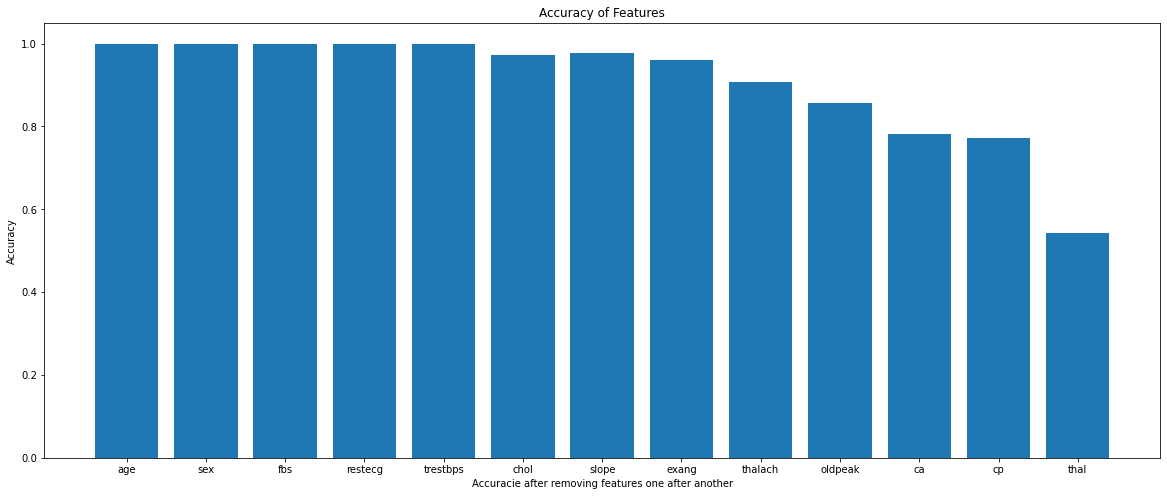

In [103]:
import matplotlib.pyplot as plt

# define the feature names and their corresponding accuracies
feature_names = ['age', 'sex', 'fbs', 'restecg', 'trestbps', 'chol', 'slope', 'exang', 'thalach', 'oldpeak', 'ca', 'cp', 'thal']
accuracies = [1.0, 1.0, 1.0, 1.0, 1.0, 0.9718562364578247, 0.9767174124717712, 0.9614942073822021, 0.906741738319397, 0.8555712103843689, 0.7807343006134033, 0.7711398005485535, 0.5433030724525452]

# create a bar chart
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(feature_names, accuracies)

# add labels and title
ax.set_xlabel('Accuracie after removing features one after another')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Features')
plt.savefig("featureReduction")
# display the chart
plt.show()